In [1]:
import numpy as np
from PIL import Image
import random

import torch
from torchvision import transforms as T
from torchvision.transforms import functional as F
import torchvision.transforms as transforms
from torchvision.datasets import Cityscapes

import augmentations as A

In [2]:
# Define a list of transformations
augment_tranmforms = [A.Resize((256, 256)),
                    A.RandomHorizontalFlip(),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.RandomCropWithProbability(250, 0.5),
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
data_transforms = A.Compose(augment_tranmforms)

dataset_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\archive'

# Augmenting the images and mask at the same time
# Create transformed and AUGMENTED train dataset
augment_train_dataset = Cityscapes(dataset_path, split='train', mode='fine',
                            target_type='semantic', transforms=data_transforms)

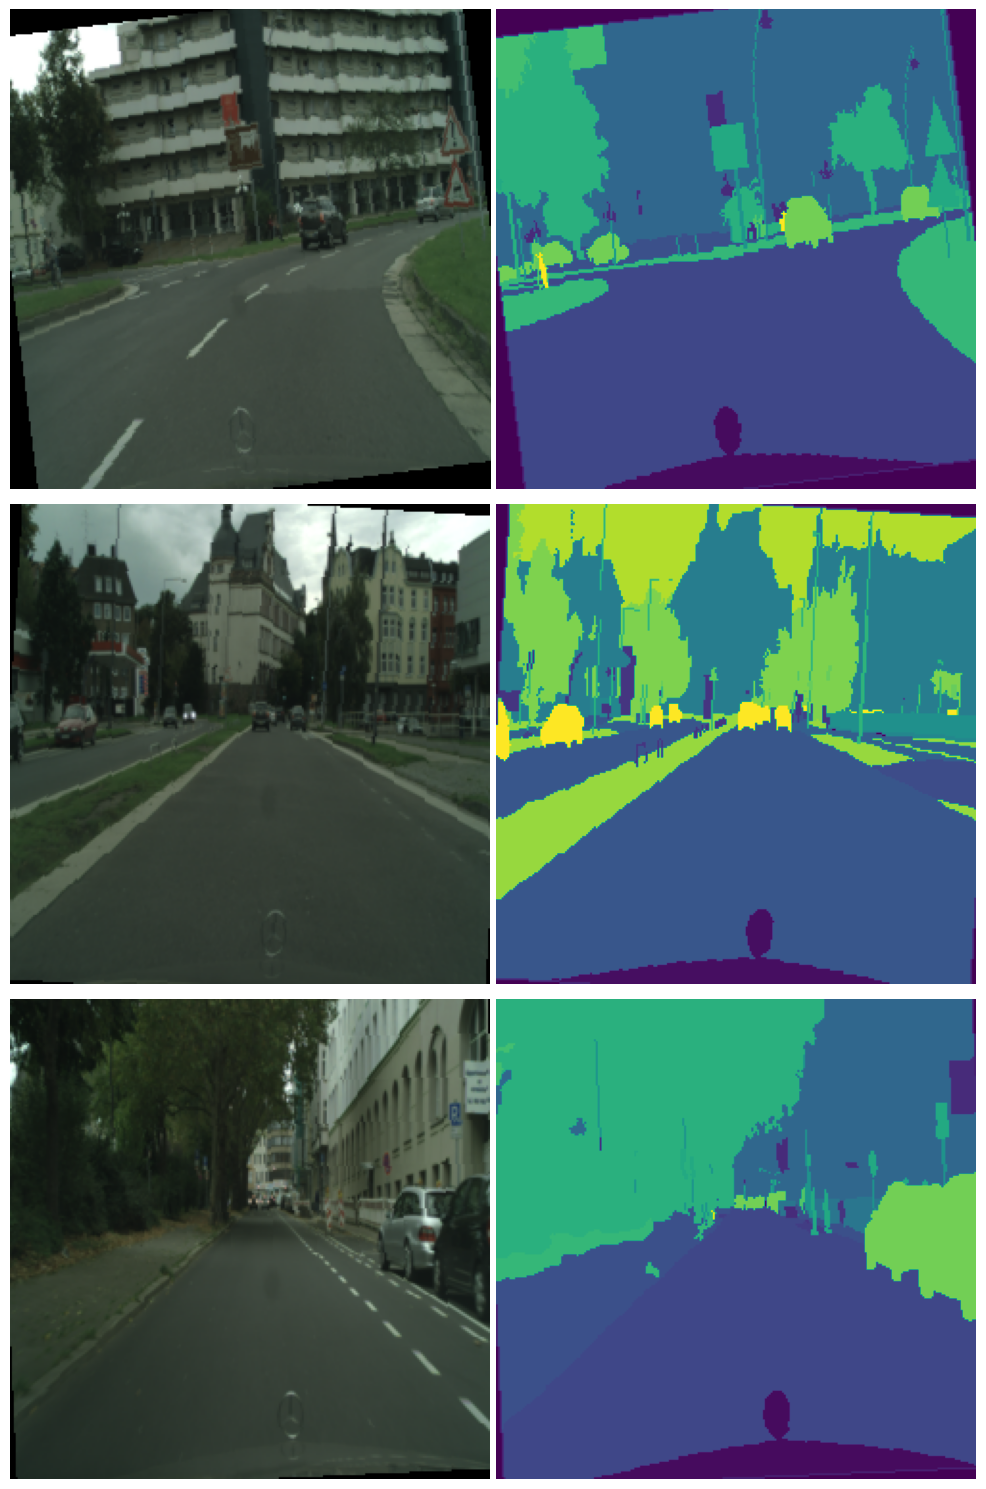

In [5]:
import matplotlib.pyplot as plt

# Get the first three samples from the training dataset
samples = [augment_train_dataset[i] for i in range(3)]

# Create a 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for i, (img, mask) in enumerate(samples):
    # The images and masks are PyTorch tensors, so we need to convert them to numpy arrays for visualization
    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()

    # Plot the image in the first column
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')

    # Plot the mask in the second column
    axs[i, 1].imshow(mask)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Define the transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Resize((256,256))
])

# Define a list of transformations
aug_tranmforms = [A.Resize((256, 256)),
                    A.RandomHorizontalFlip(),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.RandomCropWithProbability(220, 0.5),
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
augment_transforms = A.Compose(aug_tranmforms)

# Create transformed train dataset
training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)
# training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transforms=data_transforms)

# Create augmented train dataset
# augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=augment_tranmforms, target_transform=augment_transforms)
augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine',
                            target_type='semantic', transforms=augment_transforms)


In [7]:
# Get the first item from the dataset
item = training_dataset[0]

# Print the type of the item
print(f'Type: {type(item)}')

img, mask = item

# If the item is a tuple, print the type and size of its elements
if isinstance(item, tuple):
    print(f'First element type (image): {type(img)}, size: {img.shape}')
    print(f'Second element type (mask): {type(mask)}, size: {mask.shape}')

Type: <class 'tuple'>
First element type (image): <class 'torch.Tensor'>, size: torch.Size([3, 256, 256])
Second element type (mask): <class 'torch.Tensor'>, size: torch.Size([1, 256, 256])


c:\Users\jakub\anaconda3\envs\experiments\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [8]:
augment_item= augmented_dataset[0]

# Print the type of the item
print(f'Type: {type(augment_item)}')

augment_img, augment_mask = augment_item

# If the item is a tuple, print the type and size of its elements
if isinstance(augment_item, tuple):
    print(f'First element type (image): {type(augment_img)}, size: {augment_img.shape}')
    print(f'Second element type (mask): {type(augment_mask)}, size: {augment_mask.shape}')
    

Type: <class 'tuple'>
First element type (image): <class 'torch.Tensor'>, size: torch.Size([3, 256, 256])
Second element type (mask): <class 'torch.Tensor'>, size: torch.Size([1, 256, 256])


In [9]:
# Get the first item from each dataset
non_augmented_image, non_augmented_mask = training_dataset[0]
augmented_image, augmented_mask = augmented_dataset[0]

# Print the type and size of the images and masks
print(f'Non-augmented image type: {type(non_augmented_image)}, size: {non_augmented_image.size}')
print(f'Non-augmented mask type: {type(non_augmented_mask)}, size: {non_augmented_mask.size}')
print(f'Augmented image type: {type(augmented_image)}, size: {augmented_image.size}')
print(f'Augmented mask type: {type(augmented_mask)}, size: {augmented_mask.size}')

Non-augmented image type: <class 'torch.Tensor'>, size: <built-in method size of Tensor object at 0x0000019107205B80>
Non-augmented mask type: <class 'torch.Tensor'>, size: <built-in method size of Tensor object at 0x000001910DBF1680>
Augmented image type: <class 'torch.Tensor'>, size: <built-in method size of Tensor object at 0x000001910DBF16D0>
Augmented mask type: <class 'torch.Tensor'>, size: <built-in method size of Tensor object at 0x000001910DBF1770>


In [10]:
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Combine the datasets
combined_dataset = ConcatDataset([training_dataset, augmented_dataset])

# Determine the lengths of the training and validation sets
total_size = len(combined_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

# Split the datasets
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, 
                                pin_memory=True if torch.cuda.is_available() else False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, 
                                pin_memory=True if torch.cuda.is_available() else False)

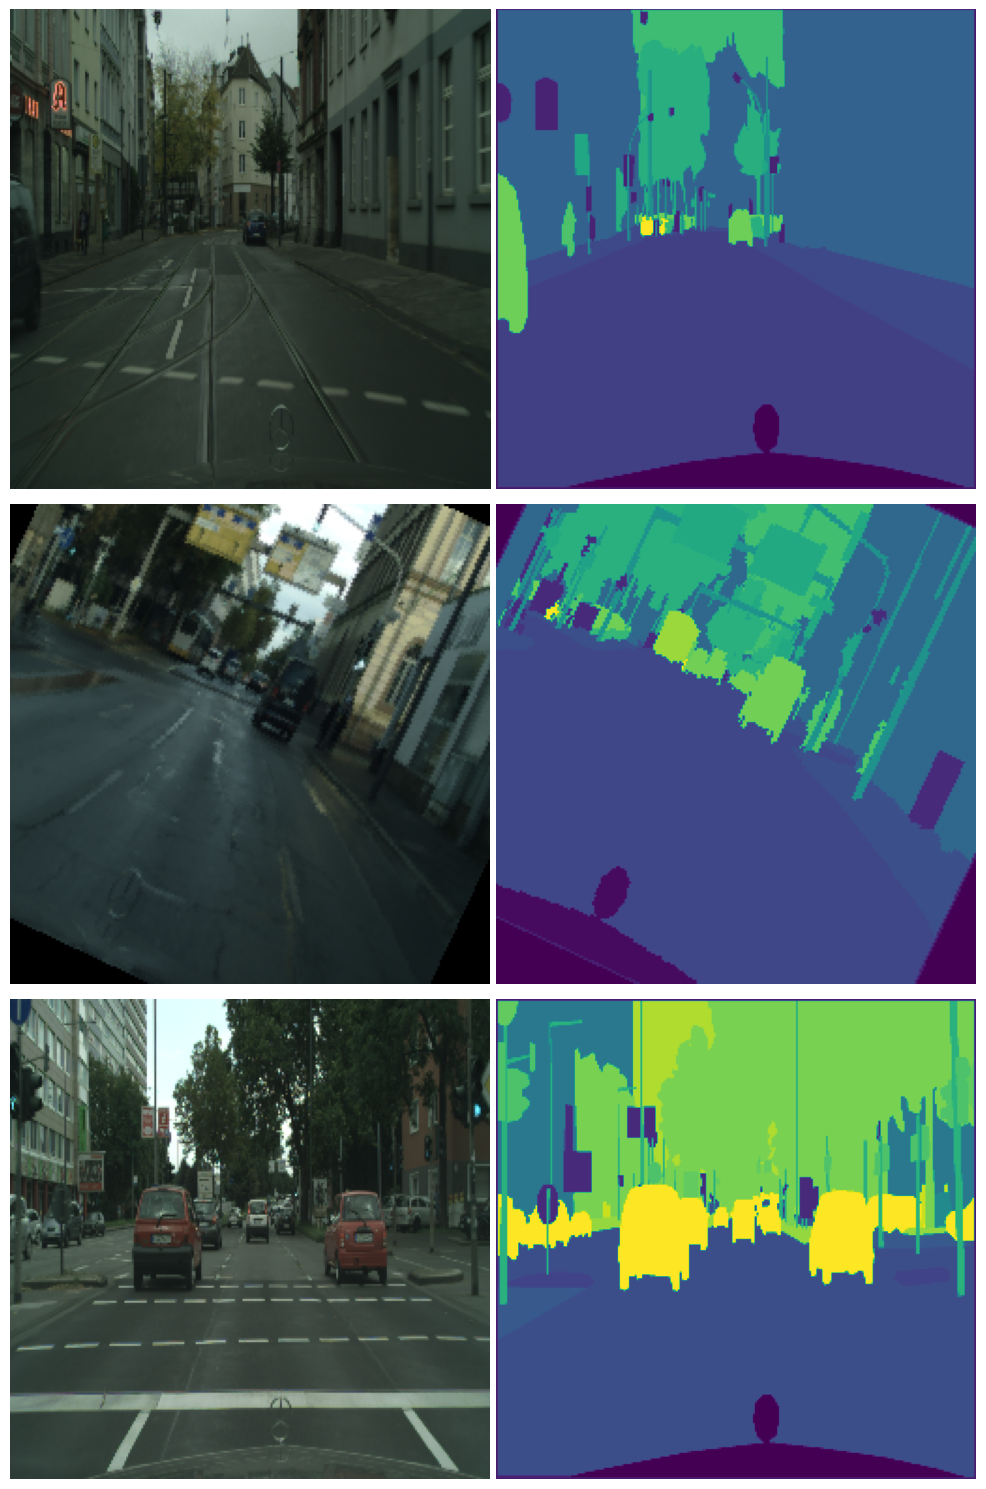

In [11]:
import matplotlib.pyplot as plt

# Get the first three samples from the training dataset
samples = [train_dataset[i] for i in range(3)]

# Create a 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for i, (img, mask) in enumerate(samples):
    # The images and masks are PyTorch tensors, so we need to convert them to numpy arrays for visualization
    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()

    # Plot the image in the first column
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')

    # Plot the mask in the second column
    axs[i, 1].imshow(mask)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()